# Chap10 - Ex1 - Iris - XGBClassifier

# Classify Iris species based on sepal length, sepal width, petal length, petal width

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [6]:
iris = pd.read_excel('Data/Iris.xls')

iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris['iris'].value_counts()

iris
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## <span style = 'color:yellow'> Build XGBoostClassifier

In [27]:
x = iris.drop('iris', axis = 1)

from sklearn.preprocessing import LabelEncoder
label_encd = LabelEncoder()
y = label_encd.fit_transform(iris['iris'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

Accuracy on train set: 0.9904761904761905
Accuracy on test  set: 0.9333333333333333


Confusion matrix:
                  Iris-setosa  Iris-versicolor  Iris-virginica
Iris-setosa               14                0               0
Iris-versicolor            1               16               1
Iris-virginica             0                1              12


Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.97        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.93      0.93      0.93        45



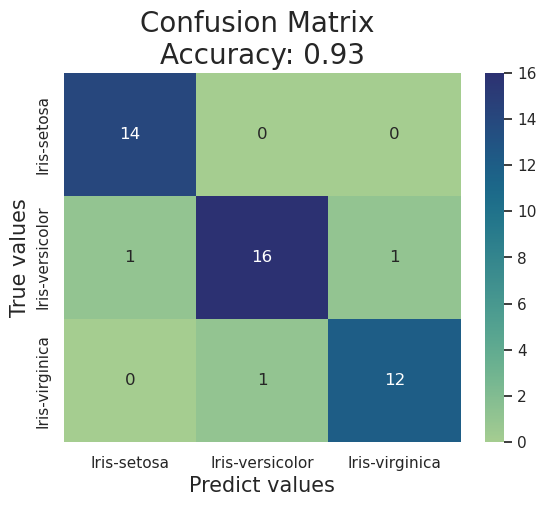

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

xgb_clf = XGBClassifier(objective = 'multi:softmax', min_child_weight = 5, num_class = 3, seed = 1)
xgb_clf.fit(x_train, y_train,
            verbose = False,
            eval_set = [(x_test, y_test)])

## Evaluation

y_test_pred = xgb_clf.predict(x_test)

print(f'Accuracy on train set: {xgb_clf.score(x_train, y_train)}')
print(f'Accuracy on test  set: {xgb_clf.score(x_test, y_test)}')
print()

labels = list(label_encd.classes_)
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')
print()
print(f'\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

sbn.set_theme(style='darkgrid')
sbn.heatmap(cm_df, cmap='crest', annot=True, fmt='g')
plt.xlabel("Predict values", size=15)
plt.ylabel("True values", size=15)
plt.title(f'Confusion Matrix \nAccuracy: {xgb_clf.score(x_test, y_test):.2f}', size=20)

plt.show()